In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
MallCustomers = pd.read_csv('Mall_Customers.csv')

In [33]:
print(MallCustomers)
MallCustomers.info()

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 column

##### Changing Genre with processable numeric variables, 0 for Male and 1 for Female.

In [34]:
MallCustomers['Genre'] = MallCustomers['Genre'].replace({"Male":0, "Female":1})

##### Checking the distribution in variables.

In [35]:
for i in MallCustomers:
    print(MallCustomers[i].value_counts(normalize=True))

CustomerID
1      0.005
138    0.005
128    0.005
129    0.005
130    0.005
       ...  
70     0.005
71     0.005
72     0.005
73     0.005
200    0.005
Name: proportion, Length: 200, dtype: float64
Genre
1    0.56
0    0.44
Name: proportion, dtype: float64
Age
32    0.055
35    0.045
19    0.040
31    0.040
30    0.035
49    0.035
40    0.030
38    0.030
47    0.030
27    0.030
36    0.030
23    0.030
34    0.025
20    0.025
29    0.025
50    0.025
48    0.025
21    0.025
24    0.020
18    0.020
28    0.020
67    0.020
59    0.020
54    0.020
43    0.015
60    0.015
45    0.015
39    0.015
33    0.015
37    0.015
22    0.015
25    0.015
46    0.015
68    0.015
52    0.010
44    0.010
66    0.010
57    0.010
26    0.010
53    0.010
42    0.010
63    0.010
70    0.010
51    0.010
58    0.010
65    0.010
41    0.010
55    0.005
69    0.005
64    0.005
56    0.005
Name: proportion, dtype: float64
Annual Income (k$)
54     0.06
78     0.06
48     0.03
71     0.03
63     0.03
       ... 
5

##### Getting a summary of my data.

In [36]:
MallCustomers.describe()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


##### I will create classes for income groups by quantiles.

##### After random forest classification test, I also decided it is best to group spending scores as well. Otherwise accuracy suffered around 0.02.
##### By using spending groups with only 5 groups, accuracy increased above 0.4. 

In [37]:
MallCustomers['income_groupQ'] = pd.qcut(MallCustomers['Annual Income (k$)'], [0,0.2,0.4,0.6,0.8,1], labels=False) + 1


MallCustomers['spending_groupQ'] = pd.qcut(MallCustomers['Spending Score (1-100)'], [0,0.2,0.4,0.6,0.8,1], labels=False) + 1

MallCustomers['Age_groupQ'] = pd.qcut(MallCustomers['Age'], [0,0.2,0.4,0.6,0.8,1], labels=False) + 1

##### I want to visualise my data by pairs to understand its nature and decide for clustering. 

C:\Users\omen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


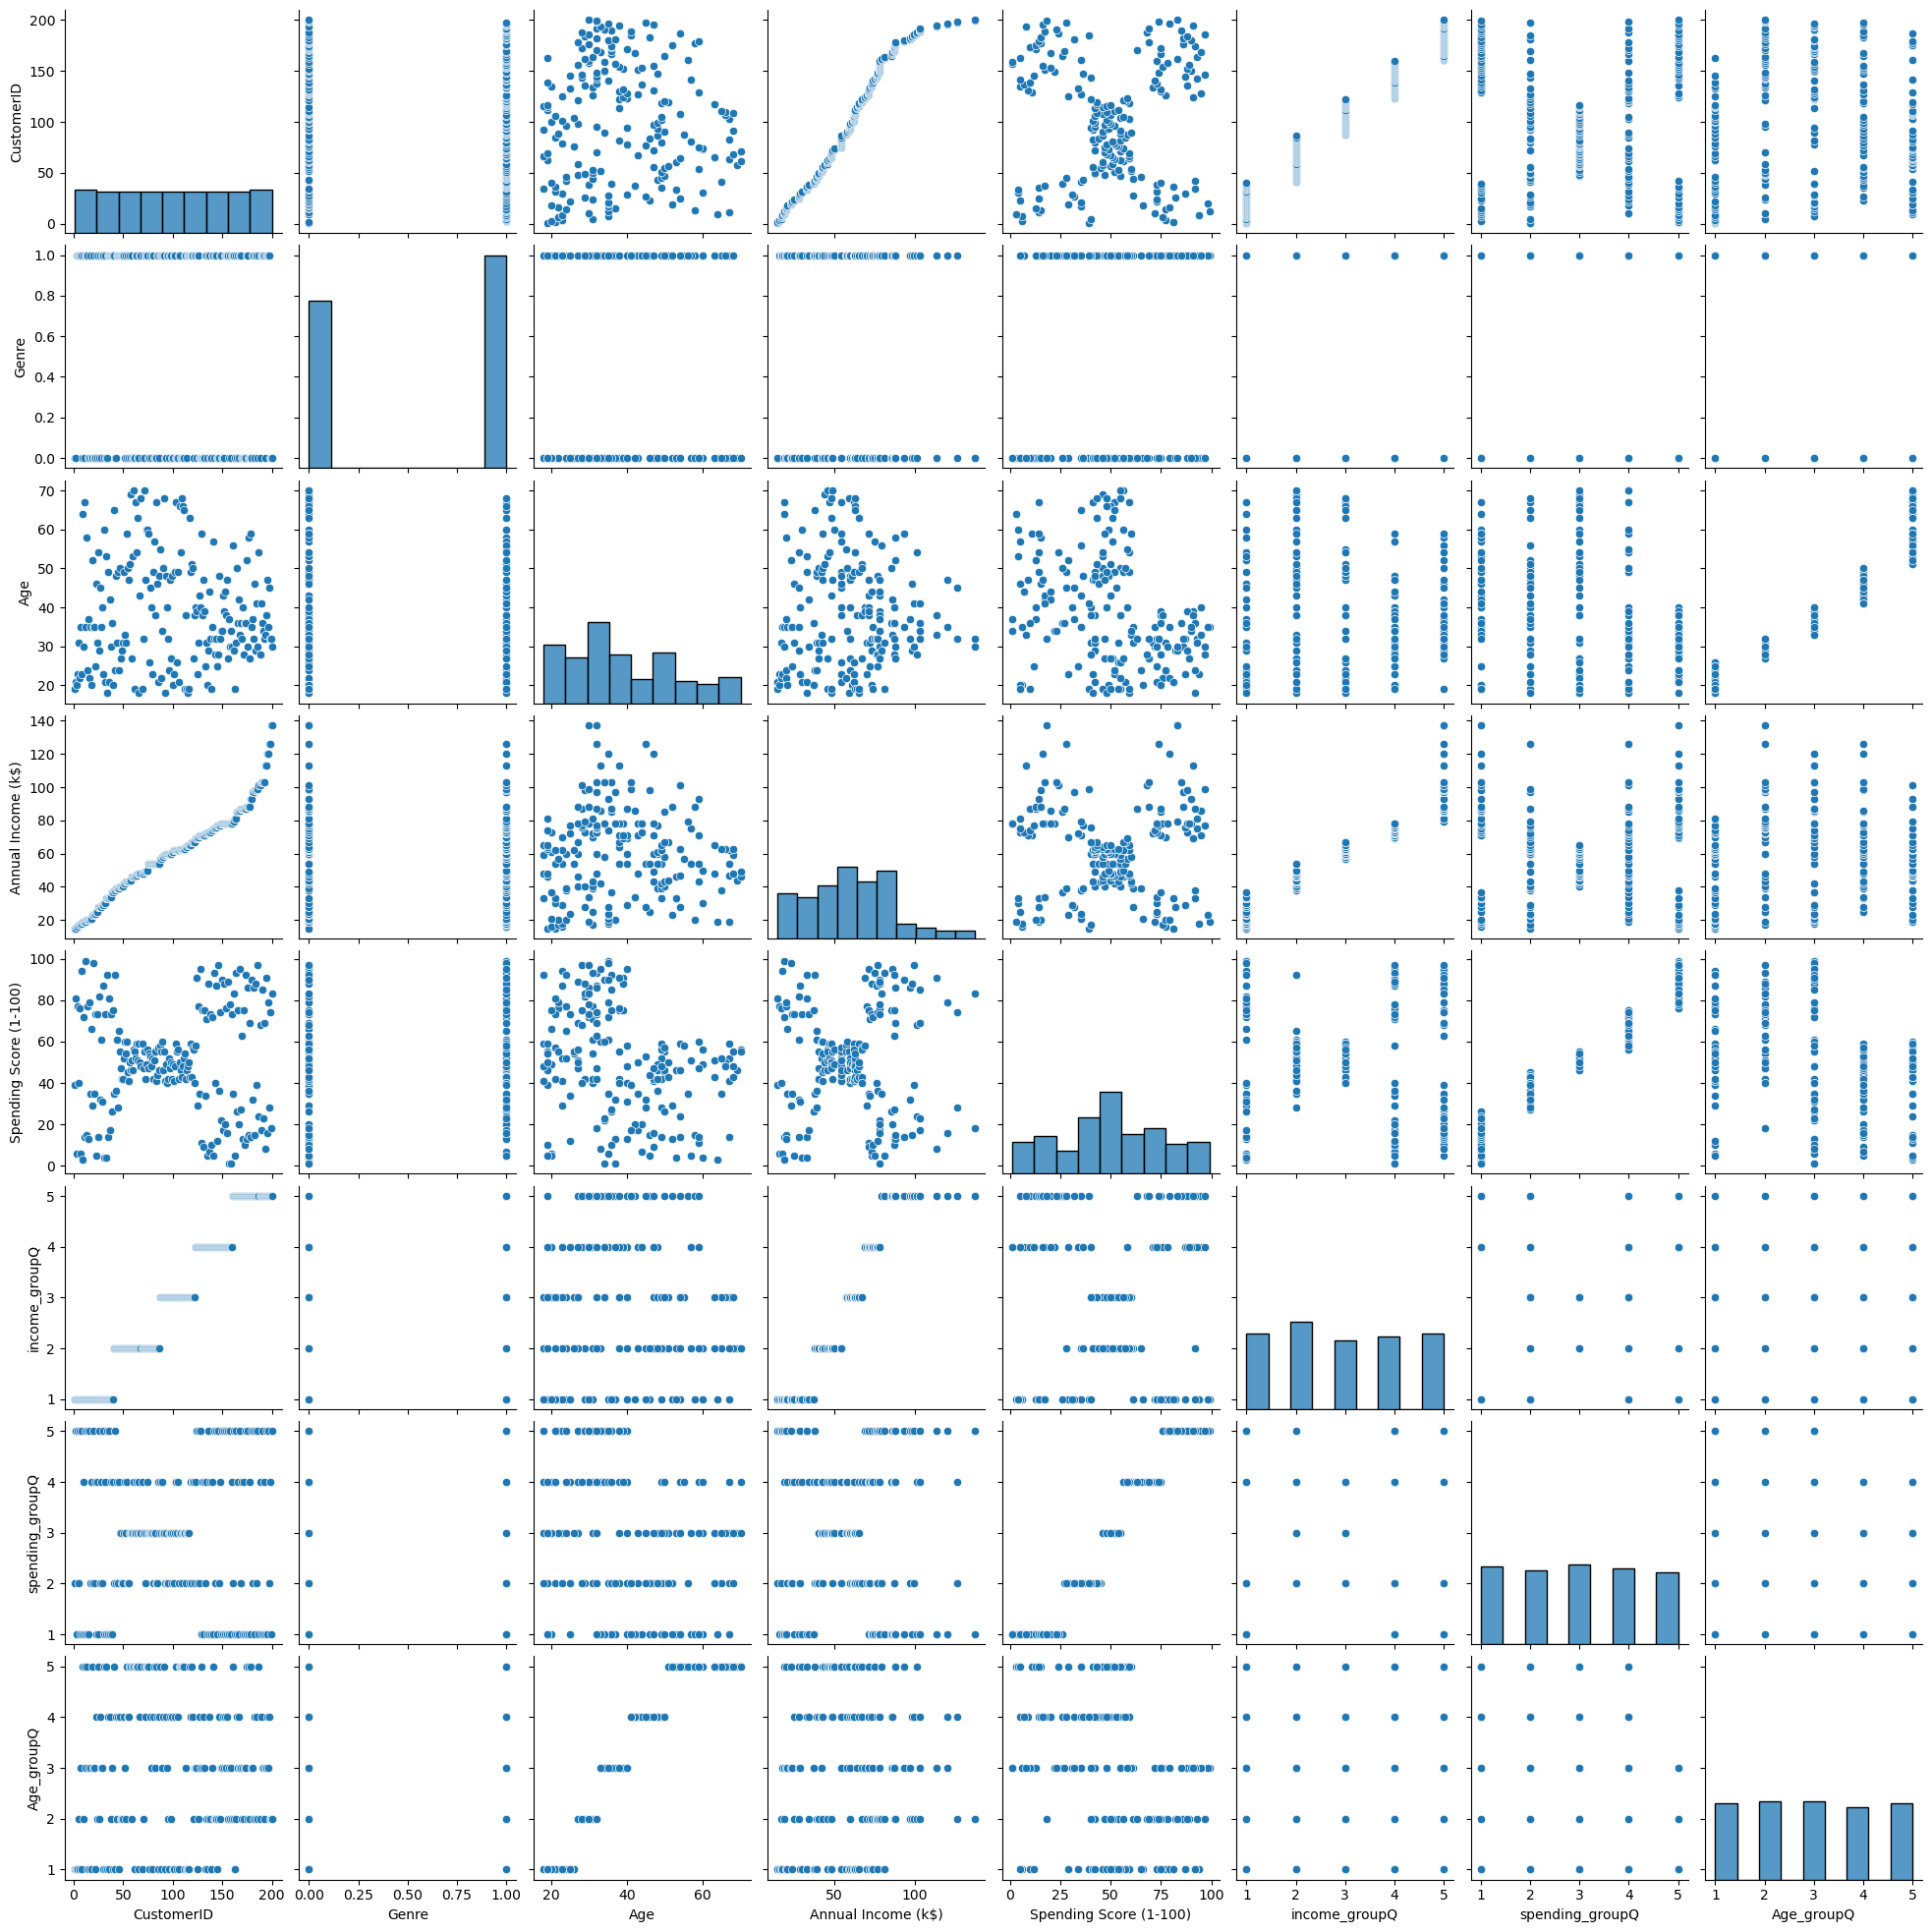

In [38]:
sns.pairplot(MallCustomers)

##### I realize that Annual Income - Spending Score has some form of clustering. Although it will be hard to distinguish for lower-higher bounds.

##### Additionally, I want to see the correlation between variables to test the claim I had from paired plot.

<Axes: >

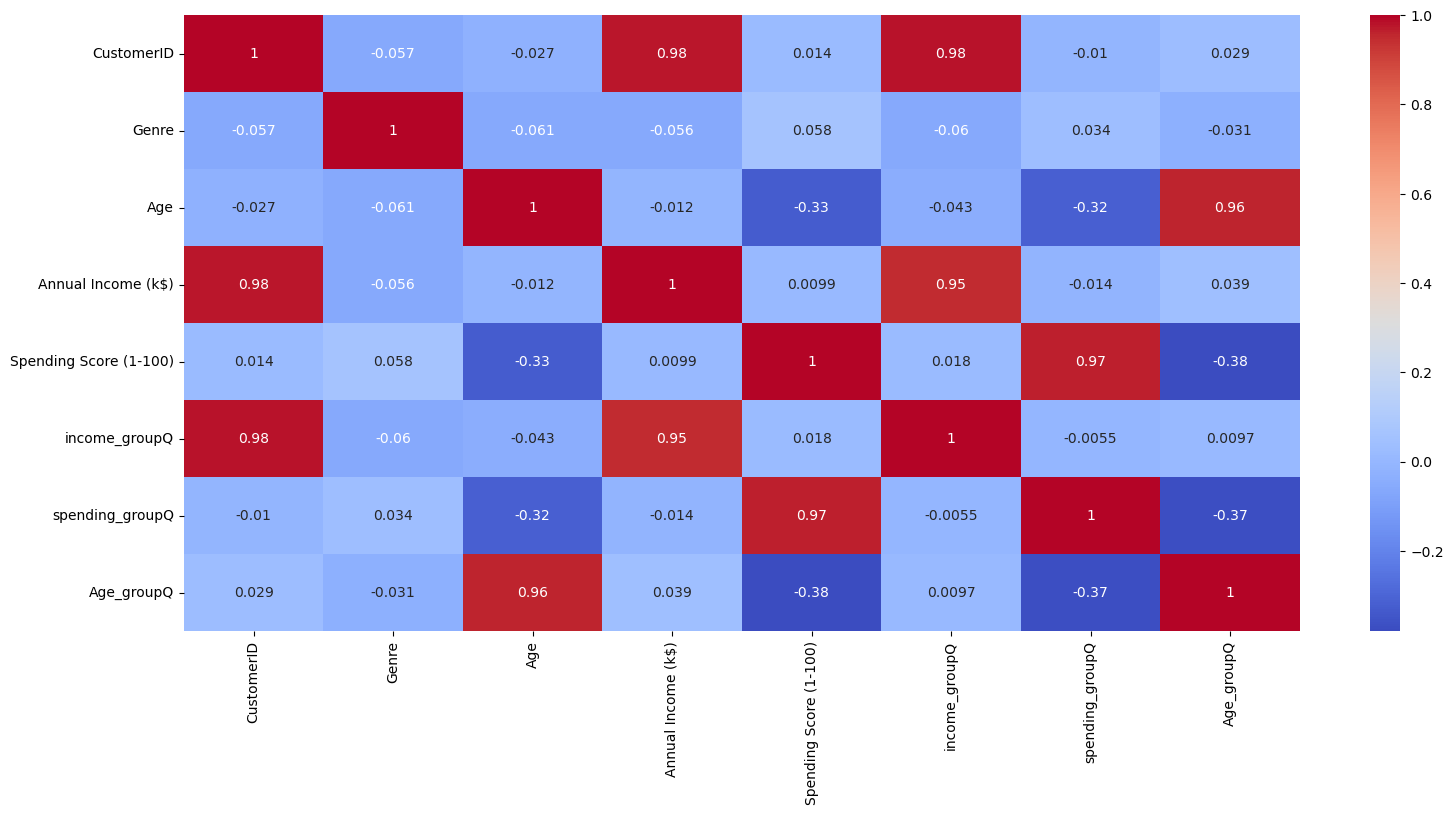

In [39]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(MallCustomers.corr(), annot=True, cmap='coolwarm', ax=ax)

##### From this data, I see that Customer ID is defined by Annual Income of a customer. 
##### And spending score is only correlated (negatively) with Age. 
##### Surprisingly, Annual Income has correlation with spending score. I think the reason is the explanation above, we can't distinguish lower and upper bounds.

## Running Machine Learning Models From SKLearn

**From what I've learned from prior analysis, I will divide my independent variables into different sets.**
**Since I know what is correlated with spending income, I will create a singular regressor set, by Age only.**
**Additionally, I will create some permutations of Annual Income and Gender.

**Customer ID represents Annual Income by order. Therefore, I will only need one of them. Same is for income_groupQ variable.

In [40]:

# This is my raw regressor set.
X = MallCustomers.drop(columns=["Spending Score (1-100)", "spending_groupQ"])

# These are my different set of regressors.
X1 = MallCustomers[['Age_groupQ']]
X2 = MallCustomers[['Age_groupQ', 'Annual Income (k$)']]
X3 = MallCustomers[['Age_groupQ', 'income_groupQ']]
X4 = MallCustomers[['Age_groupQ', 'Genre']]
X5 = MallCustomers[['Genre', 'Annual Income (k$)']]
X6 = MallCustomers[['Age_groupQ', 'Genre', 'Annual Income (k$)']]
X7 = MallCustomers[['Age_groupQ', 'Genre', 'income_groupQ']]
X8 = MallCustomers[['income_groupQ', 'Genre']]
X9 = MallCustomers[['income_groupQ']]

# My target variable.
y = MallCustomers[['spending_groupQ']]
yy = MallCustomers[['Spending Score (1-100)']]


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [42]:

# Step: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.25, random_state=100)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.25, random_state=100)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.25, random_state=100)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size=0.25, random_state=100)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y, test_size=0.25, random_state=100)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y, test_size=0.25, random_state=100)
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y, test_size=0.25, random_state=100)
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y, test_size=0.25, random_state=100)
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y, test_size=0.25, random_state=100)
X00_train, X00_test, y00_train, y00_test = train_test_split(X, yy, test_size=0.25, random_state=100)

In [43]:

# Step: Model Training
#Random Forest

# I am testing all my sets.

rf_model = RandomForestClassifier(random_state=100)
rf_model.fit(X_train, y_train.values.ravel())
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
r2 = r2_score(y_test, rf_predictions)


rf_model1 = RandomForestClassifier(random_state=100)
rf_model1.fit(X1_train, y1_train.values.ravel())
rf_predictions1 = rf_model1.predict(X1_test)
rf_accuracy1 = accuracy_score(y1_test, rf_predictions1)
r2_1 = r2_score(y1_test, rf_predictions1)


rf_model2 = RandomForestClassifier(random_state=100)
rf_model2.fit(X2_train, y2_train.values.ravel())
rf_predictions2 = rf_model2.predict(X2_test)
rf_accuracy2 = accuracy_score(y2_test, rf_predictions2)
r2_2 = r2_score(y2_test, rf_predictions2)

rf_model3 = RandomForestClassifier(random_state=100)
rf_model3.fit(X3_train, y3_train.values.ravel())
rf_predictions3 = rf_model3.predict(X3_test)
rf_accuracy3 = accuracy_score(y3_test, rf_predictions3)
r2_3 = r2_score(y3_test, rf_predictions3)

rf_model4 = RandomForestClassifier(random_state=100)
rf_model4.fit(X4_train, y4_train.values.ravel())
rf_predictions4 = rf_model4.predict(X4_test)
rf_accuracy4 = accuracy_score(y4_test, rf_predictions4)
r2_4 = r2_score(y4_test, rf_predictions4)

rf_model5 = RandomForestClassifier(random_state=100)
rf_model5.fit(X5_train, y5_train.values.ravel())
rf_predictions5 = rf_model5.predict(X5_test)
rf_accuracy5 = accuracy_score(y5_test, rf_predictions5)
r2_5 = r2_score(y5_test, rf_predictions5)

rf_model6 = RandomForestClassifier(random_state=100)
rf_model6.fit(X6_train, y6_train.values.ravel())
rf_predictions6 = rf_model6.predict(X6_test)
rf_accuracy6 = accuracy_score(y6_test, rf_predictions6)
r2_6 = r2_score(y6_test, rf_predictions6)

rf_model7 = RandomForestClassifier(random_state=100)
rf_model7.fit(X7_train, y7_train.values.ravel())
rf_predictions7 = rf_model7.predict(X7_test)
rf_accuracy7 = accuracy_score(y7_test, rf_predictions7)
r2_7 = r2_score(y7_test, rf_predictions7)

rf_model8 = RandomForestClassifier(random_state=100)
rf_model8.fit(X8_train, y8_train.values.ravel())
rf_predictions8 = rf_model8.predict(X8_test)
rf_accuracy8 = accuracy_score(y8_test, rf_predictions8)
r2_8 = r2_score(y8_test, rf_predictions8)


rf_model9 = RandomForestClassifier(random_state=100)
rf_model9.fit(X9_train, y9_train.values.ravel())
rf_predictions9 = rf_model9.predict(X9_test)
rf_accuracy9 = accuracy_score(y9_test, rf_predictions9)
r2_9 = r2_score(y9_test, rf_predictions9)


rf_model00 = RandomForestClassifier(random_state=100)
rf_model.fit(X00_train, y00_train.values.ravel())
rf_predictions00 = rf_model.predict(X00_test)
rf_accuracy00 = accuracy_score(y00_test, rf_predictions00)
r2_00 = r2_score(y00_test, rf_predictions00)



# Print the accuracies
print(f"Random Forest Accuracy X: {rf_accuracy}")
print(f'R2 Score: {r2}')
print(f"Random Forest Accuracy X1: {rf_accuracy1}")
print(f'R2 Score: {r2_1}')
print(f"Random Forest Accuracy X2: {rf_accuracy2}")
print(f'R2 Score: {r2_2}')
print(f"Random Forest Accuracy X3: {rf_accuracy3}")
print(f'R2 Score: {r2_3}')
print(f"Random Forest Accuracy X4: {rf_accuracy4}")
print(f'R2 Score: {r2_4}')
print(f"Random Forest Accuracy X5: {rf_accuracy5}")
print(f'R2 Score: {r2_5}')
print(f"Random Forest Accuracy X6: {rf_accuracy6}")
print(f'R2 Score: {r2_6}')
print(f"Random Forest Accuracy X7: {rf_accuracy7}")
print(f'R2 Score: {r2_7}')
print(f"Random Forest Accuracy X8: {rf_accuracy8}")
print(f'R2 Score: {r2_8}')
print(f"Random Forest Accuracy X9: {rf_accuracy9}")
print(f'R2 Score: {r2_9}')


Random Forest Accuracy X: 0.44
R2 Score: 0.3078254181888097
Random Forest Accuracy X1: 0.2
R2 Score: -0.6150740242261106
Random Forest Accuracy X2: 0.48
R2 Score: 0.28859834647183225
Random Forest Accuracy X3: 0.48
R2 Score: 0.3847337050567198
Random Forest Accuracy X4: 0.32
R2 Score: -0.4420303787733131
Random Forest Accuracy X5: 0.24
R2 Score: -1.47067871563161
Random Forest Accuracy X6: 0.46
R2 Score: 0.06748702172659082
Random Forest Accuracy X7: 0.5
R2 Score: 0.33666602576427596
Random Forest Accuracy X8: 0.44
R2 Score: -1.2014997115939248
Random Forest Accuracy X9: 0.4
R2 Score: -1.4322245721976548


###### From these tests, we see that Age and Income group by quantiles are good choices for predicting spending score.

In [44]:

# Model 2: Support Vector Machine (SVM)
svm_model = SVC(random_state=100)
svm_model.fit(X_train, y_train.values.ravel())
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)


# Model 3: k-Nearest Neighbors (kNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train.values.ravel())
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)


# Model 4: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train.values.ravel())
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"SVM Accuracy: {svm_accuracy}")
print(f"kNN Accuracy: {knn_accuracy}")
print("Mean Squared Error:", mse, "R-squared:", r2)

SVM Accuracy: 0.42
kNN Accuracy: 0.36
Mean Squared Error: 1.7597245248763784 R-squared: 0.15414125895194253
